<a href="https://colab.research.google.com/github/SrivinaySridhar/MLT_workshop/blob/main/Kernel_Regression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Data

$\mathbf{X}$ is a feature matrix corresponding to $n$ training examples, each represented with $d$ features and has shape $d \times n$.  
\begin{equation}
  \mathbf{X}_{d \times n} = \begin{bmatrix}
       | & | &\dots & |\\
       \mathbf{x}_{1}&  
       \mathbf{x}_{2} &
      \dots &
       \mathbf{x}_{n}  \\
        | & | &\dots & |\\
    \end{bmatrix}
\end{equation}

* here each $\mathbf{x}_i \in \mathbb{R}^d$

*  $\mathbf{y}$ is a label vector of shape $n \times 1$.  
\begin{equation}
    \mathbf{y} = \begin{bmatrix}
        y_{1}  \\
        y_{2} \\
        \vdots  \\
        y_{n} \\
      \end{bmatrix}
\end{equation}

*  The $i$-th entry in this vector, $\mathbf{y}[i]$ gives label for $i$-th example, which is denoted by $y_{i} \in \mathbb{R}$.

### Training data

Generated from a deterministic distribution with Noise ~ Normal(0, 1)

$$y_{train} = 2X^3 + 3X^2 + 4 + Noise$$

In [2]:
rng = np.random.default_rng(seed = 101)

X_train = (np.arange(-2, 2, 0.01).reshape(1, -1))

y_train = (2 * (X_train)**3 + 3 * (X_train)**2 + 4 + rng.normal(0, 1, X_train.shape[1]).reshape(1, -1)).T

In [3]:
X_train.shape, y_train.shape

((1, 400), (400, 1))

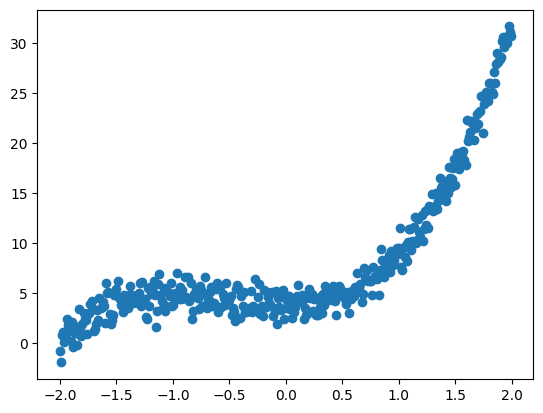

In [4]:
plt.scatter(X_train, y_train);

### Test data

Generated from a deterministic distribution with Noise ~ Normal(0, 2)

$$y_{test} = 2X^3 + 3X^2 + 4 + Noise$$

In [5]:
rng = np.random.default_rng(seed = 102)

X_test = np.arange(-2, 2, 0.02).reshape(1, -1)

y_test = (2 * (X_test)**3 + 3 * (X_test)**2 + 4 + rng.normal(0, 2, X_test.shape[1]).reshape(1, -1)).T

In [6]:
X_test.shape, y_test.shape

((1, 200), (200, 1))

## Model

Linear regression model for the dataset ${\mathbb{x}, y}$ is given as
$$h_w(\mathbb{x}) = w_1x^{1}+w_2x^{2}+...+w_dx^{d} =  \mathbf{x}^Tw
$$

where $x^{i}$ is the $i^{th}$ feature of the data point $\mathbf{x}$ and $w = [w_1, w_2, ...w_d]^T$ is the weight vector.


Notice that above model always pass through the origin but for a given dataset, best fit model need not pass through the origin. To tackle this issue, we add an intercept $w_0$ in the model and set the corresponding featrue $x^{0}$ to $1$. That is

$$h_w(\mathbb{x}) =w_0x^{0}+ w_1x^{1}+w_2x^{2}+...+w_dx^{n} =  \mathbf{x}^Tw
$$

We call $x^{0}$ the dummy feature and set its value to 1 for each examples. Now $w$ is of shape $(d+1, 1)$ and $\mathbf{X}$ is of shape $(d+1, n)$ where the first row of $\mathbf{X}$ has entries as 1.


### Add dummy feature

In [7]:
dummy_feature = np.ones(X_train.shape[1])
X = np.row_stack((dummy_feature, X_train))

In [8]:
X.shape

(2, 400)

Test data

In [9]:
dummy_feature_t = np.ones(X_test.shape[1])
X_t = np.row_stack((dummy_feature_t, X_test))

In [10]:
X_t.shape

(2, 200)

## Loss function

The total loss is the sum of square of errors between actual and predicted labels for each training point.  

The error for $i$-th training point is calculated as follows:
\begin{eqnarray}
e^{(i)} &=& (\mathrm{{actual\ label} - {predicted\ label}})^2 \\
        &=& \left ({y_{i}} -
        {h_{\mathbf{w}}(\mathbf{x}_{i})} \right)^2 \\
        &=& \left ({y_{i}} -
        {\mathbf{w}^T \mathbf{x}_{i}} \right)^2
\end{eqnarray}



The total loss $L(\mathbf{w})$ is sum of errors at each training point:
\begin{equation}
L(\mathbf{w}) = \sum_{i=1}^{n} e^{(i)}
\end{equation}

We divide this by $\frac{1}{2}$ for mathematical convenience in later use:


\begin{eqnarray}
  L(\mathbf{w}) &=& \frac{1}{2} \sum_{i=1}^{n} e^{(i)} \\ &=&  \frac{1}{2} \left({{\mathbf{X}^T \mathbf{w}}} - \mathbf{y} \right)^T \left({{\mathbf{X}^T \mathbf{w}}} - \mathbf{y} \right))
\end{eqnarray}


## Optimization



#### 1. Normal equation

Let's set $\dfrac{\partial L(\mathbf{w})}{\partial \mathbf{w}}$ to 0 and solve for $\mathbf{w}$:
\begin{eqnarray}
\frac{\partial L(\mathbf{w})}{\partial \mathbf{w}} &=& \mathbf{X} \mathbf{X}^T \mathbf{w} - \mathbf{X} \mathbf{y} = 0 \\
\mathbf{X}^T \mathbf{X} \mathbf{w} &=& \mathbf{X}^T \mathbf{Y} \\
\mathbf{w} &=& \left( \mathbf{X} \mathbf{X}^T \right)^{-1} \mathbf{X} \mathbf{y}
\end{eqnarray}



#### Find weight vector and prediction for training and test dataset

In [11]:
### weight
def weights(X, y):
    return np.linalg.pinv(X@(X.T))@X@y

In [12]:
w = weights(X, y_train)
w

array([[7.93982825],
       [4.79910241]])

## Evaluation

##### RMSE $$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$



In [13]:
### Loss function
def loss(y, y_hat):
    return np.sqrt(np.mean((y - y_hat)**2))

## Kernel Regression



* The optimal weight vector can be written as linear combination of data points.

---

Let $\phi$ be the trainsformation mapping that trasforms the $d$-dimensional data points to $D$-dimension.

$$\phi: \mathbb{R}^d \rightarrow \mathbb{R}^D$$

Then

$$\mathbf{w} = \phi(\mathbf{X})\alpha$$

where,

* $\mathbf{X}$ = Feature matrix of shape $(d, n)$
* $\alpha = [\alpha_1, \alpha_2, ..., \alpha_n]^T \in \mathbb{R}^n$



Here

$$\alpha = K^{-1}y$$

where,
\begin{equation}
 K_{n \times n} = \begin{bmatrix}
       k(\mathbf{x}_1,\mathbf{x}_1) & k(\mathbf{x}_1,\mathbf{x}_2) &\dots & k(\mathbf{x}_1,\mathbf{x}_n)\\
        k(\mathbf{x}_2,\mathbf{x}_1) & k(\mathbf{x}_2,\mathbf{x}_2) &\dots & k(\mathbf{x}_2,\mathbf{x}_n)\\
        \vdots & \vdots & \dots & \vdots\\
       k(\mathbf{x}_n,\mathbf{x}_1) & k(\mathbf{x}_n,\mathbf{x}_2) &\dots & k(\mathbf{x}_n,\mathbf{x}_n)\\
    \end{bmatrix}
\end{equation}

Here, $k$ is the kernel function

$$k: \mathbb{R}^d \times \mathbb{R}^d \rightarrow \mathbb{R}\\ k(x_1, x_2) = \phi(x_1)^T\phi(x_2)
$$

## Prediction

For a test point $\mathbf{x}_t$, prediction is given by

$$\sum\limits_{i=1}^{n}k(\mathbf{x}_i, \mathbf{x}_t)\alpha_i$$



#### Polynomial kernel of degree $p$:


$k(\mathbf{x}_1, \mathbf{x}_2) = (\mathbf{x}_1^T\mathbf{x}_2+1)^p$

\begin{equation}
  \mathbf{X} = \begin{bmatrix}
       | & | &\dots & |\\
       \mathbf{x}_{1}&  
       \mathbf{x}_{2} &
      \dots &
       \mathbf{x}_{n}  \\
        | & | &\dots & |\\
    \end{bmatrix}
\end{equation}

\begin{equation}
  \mathbf{X^TX} =\begin{bmatrix}
       | & | &\dots & |\\
       \mathbf{x}_{1}&  
       \mathbf{x}_{2} &
      \dots &
       \mathbf{x}_{n}  \\
        | & | &\dots & |\\
    \end{bmatrix}^T\begin{bmatrix}
       | & | &\dots & |\\
       \mathbf{x}_{1}&  
       \mathbf{x}_{2} &
      \dots &
       \mathbf{x}_{n}  \\
        | & | &\dots & |\\
    \end{bmatrix}
    =  \begin{bmatrix}
       \mathbf{x}_1^T\mathbf{x}_{1} &  \mathbf{x}_1^T\mathbf{x}_{2}  &\dots &  \mathbf{x}_1^T\mathbf{x}_{m} \\
      \mathbf{x}_2^T\mathbf{x}_{1} &  \mathbf{x}_2^T\mathbf{x}_{2}  &\dots &  \mathbf{x}_2^T\mathbf{x}_{m} \\
        \vdots & \vdots &\dots & \vdots\\
         \mathbf{x}_n^T\mathbf{x}_{1} &  \mathbf{x}_n^T\mathbf{x}_{2}  &\dots &  \mathbf{x}_n^T\mathbf{x}_{m} \\
    \end{bmatrix}
\end{equation}


In [14]:
# Polynomial Kernel
def poly_kernel(X, p):
    return (X.T@X+1)**p

In [15]:
# coef vector alpha
def coef(X_train, y,  p):
    K = poly_kernel(X_train, p)
    return (np.linalg.pinv(K))@y

#### For prediction

Let the training data matrix with $n$ examples is given by
 \begin{equation}
  \mathbf{X}_{train} = \begin{bmatrix}
       | & | &\dots & |\\
       \mathbf{x}_{1}&  
       \mathbf{x}_{2} &
      \dots &
       \mathbf{x}_{n}  \\
        | & | &\dots & |\\
    \end{bmatrix}
\end{equation}

and the test data matrix with $m$ examples is given by
 \begin{equation}
  \mathbf{X}_{test} = \begin{bmatrix}
       | & | &\dots & |\\
       \mathbf{x}_{t1}&  
       \mathbf{x}_{t2} &
      \dots &
       \mathbf{x}_{tm}  \\
        | & | &\dots & |\\
    \end{bmatrix}
\end{equation}

----

Then

\begin{equation}
  \mathbf{X}_{train}^T \mathbf{X}_{test}  = \begin{bmatrix}
       \mathbf{x}_1^T\mathbf{x}_{t1} &  \mathbf{x}_1^T\mathbf{x}_{t2}  &\dots &  \mathbf{x}_1^T\mathbf{x}_{tm} \\
      \mathbf{x}_2^T\mathbf{x}_{t1} &  \mathbf{x}_2^T\mathbf{x}_{t2}  &\dots &  \mathbf{x}_2^T\mathbf{x}_{tm} \\
        \vdots & \vdots &\dots & \vdots\\
         \mathbf{x}_n^T\mathbf{x}_{t1} &  \mathbf{x}_n^T\mathbf{x}_{t2}  &\dots &  \mathbf{x}_n^T\mathbf{x}_{tm} \\
    \end{bmatrix}
\end{equation}


In [16]:
# Prediction
def prediction(X_train, y_train, X_test, p):
    alpha = coef(X_train, y_train, p)
    K = (X_train.T @ X_test + 1)**p
    return K.T @ alpha

Training

In [17]:
y_hat = prediction(X_train, y_train, X_train, 3)

In [18]:
loss(y_train, y_hat)

1.0061212525621974

Test

In [19]:
y_hat_t = prediction(X_train, y_train, X_test, 3)

In [20]:
loss(y_test, y_hat_t)

2.1103921105921506

### degree vs loss

In [21]:
### Plot degree vs loss
degrees = [2, 3, 4, 5, 6]
loss_train = []
loss_test = []

for d in degrees:
    # Training
    y_hat = prediction(X_train, y_train, X_train, d)
    loss_train_iter = loss(y_train, y_hat)
    loss_train.append(loss_train_iter)

    # Testing
    y_hat_t = prediction(X_train, y_train, X_test, d)
    loss_test_iter = loss(y_test, y_hat_t)
    loss_test.append(loss_test_iter)

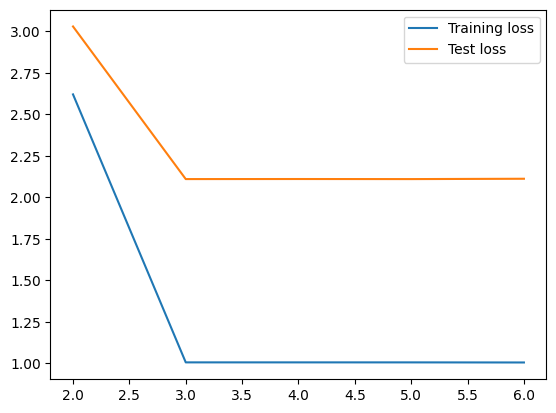

In [22]:
plt.plot(degrees, loss_train, label = "Training loss")
plt.plot(degrees, loss_test, label = "Test loss")
plt.legend();